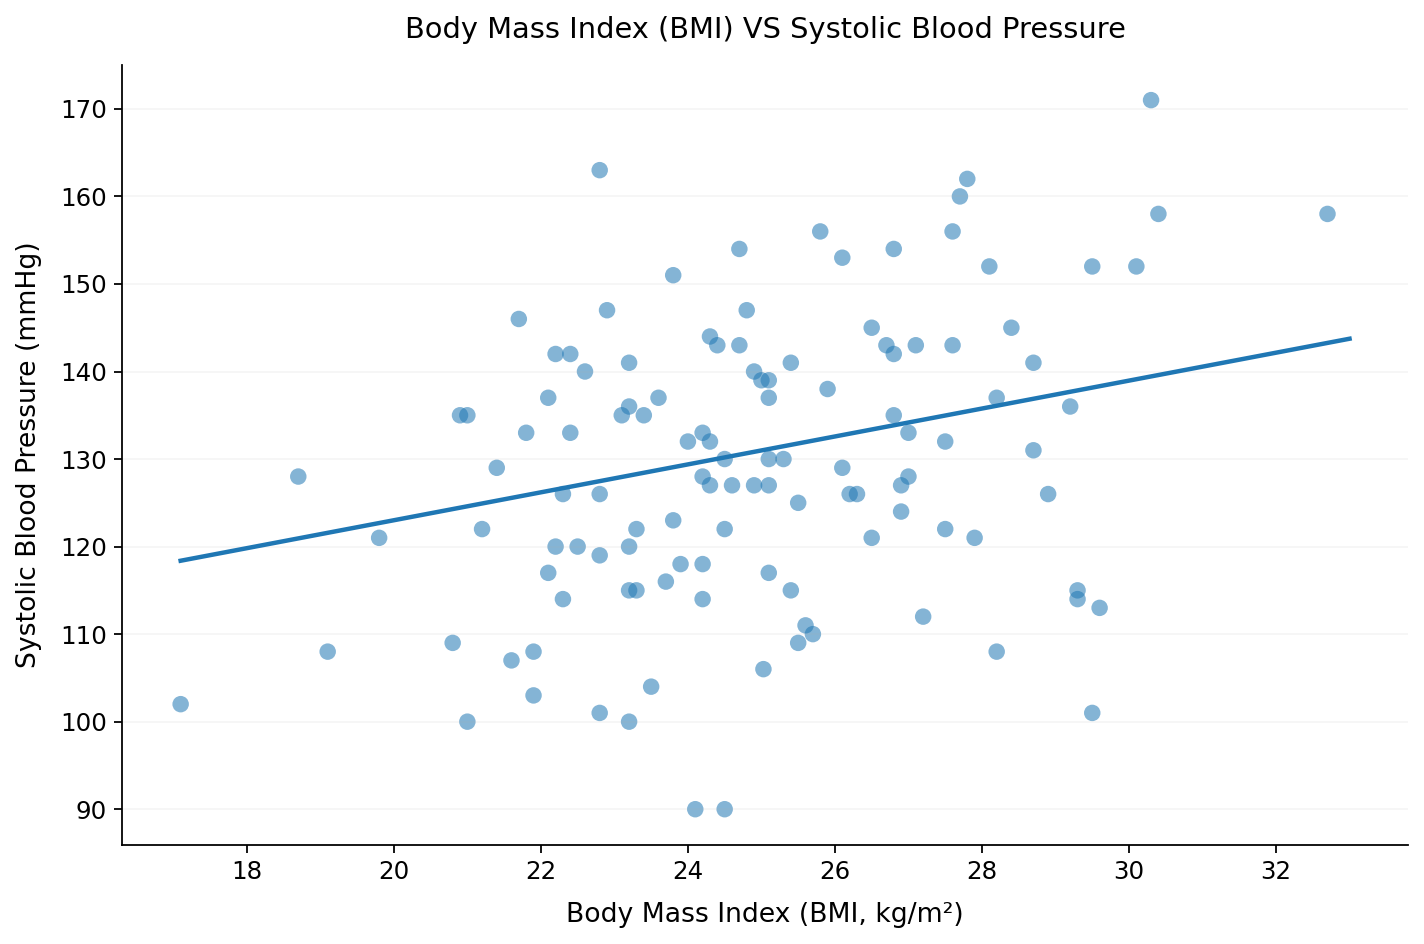

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE_NAME = "synthetic_healthcare_1700_clean.csv"

df = pd.read_csv(FILE_NAME)
df.columns = [c.strip() for c in df.columns]

df = df.rename(columns={
    "BMI (kg/m^2)": "bmi",
    "BMI (kg/m2)": "bmi",
    "Systolic BP": "systolic_bp",
    "Diagnosis Group": "diagnosis_group"
})

df["bmi"] = pd.to_numeric(df["bmi"], errors="coerce")
df["systolic_bp"] = pd.to_numeric(df["systolic_bp"], errors="coerce")
df["diagnosis_group"] = df["diagnosis_group"].astype(str).str.strip()

cardio_full = df[df["diagnosis_group"].str.lower() == "cardiology"][["bmi", "systolic_bp"]].dropna()

N_POINTS = 120
cardio = cardio_full.sample(n=min(N_POINTS, len(cardio_full)), random_state=42)

x = cardio["bmi"].to_numpy()
y = cardio["systolic_bp"].to_numpy()

fig, ax = plt.subplots(figsize=(9, 6), dpi=160)

ax.scatter(x, y, s=55, alpha=0.55, edgecolors="none")

xf = cardio_full["bmi"].to_numpy()
yf = cardio_full["systolic_bp"].to_numpy()
m, b = np.polyfit(xf, yf, 1)
xs = np.linspace(xf.min(), xf.max(), 100)
ax.plot(xs, m * xs + b, linewidth=2.0)

ax.set_title("Body Mass Index (BMI) VS Systolic Blood Pressure", fontsize=13, pad=12)

ax.set_xlabel("Body Mass Index (BMI, kg/m²)", fontsize=12, labelpad=8)
ax.set_ylabel("Systolic Blood Pressure (mmHg)", fontsize=12, labelpad=8)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, axis="y", alpha=0.12)
ax.grid(False, axis="x")
ax.tick_params(axis="both", labelsize=11)

plt.tight_layout()
plt.show()
